# Comparison of the accuracy of a cutting plane active learning procedure using the (i) analytic center; (ii) Chebyshev center; and (iii) random center on the diabetes data set

# The set up

In [1]:
import numpy as np
import pandas as pd
import active
import experiment
import logistic_regression as logr
from sklearn import datasets # The Iris dataset is imported from here.
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 1
%aimport active
%aimport experiment
%aimport logistic_regression

np.set_printoptions(precision=4)

In [2]:
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 18

# Importing and processing the diabetes data set

In this experiment we work with a data set with 2 classes and 8 features where the classes are divided between whether or not a patient has diabetes and the 8 features correspond to 8 health measurements. 

The 2 classes in this data set are not linearly seperable and it is known that the data set has missing variables.

We work with all features of the data set and  randomly divide the data set into two halves, to be used for training and testing.

In [3]:
names = ['diabetes', 'num preg', 'plasma', 'bp', 'skin fold', 'insulin', 'bmi', 'pedigree', 'age']
data = pd.read_csv('diabetes_scale.csv', header=None, names=names)
data['ones'] = np.ones((data.shape[0], 1)) # Add a column of ones
data.head()

,diabetes,num preg,plasma,bp,skin fold,insulin,bmi,pedigree,age,ones
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,1.0
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1.0
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,1.0
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1.0
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,1.0


In [4]:
np.random.seed(1)
size = data.shape[0]
index = np.arange(size)
np.random.shuffle(index)
training_index = index[:int(size/2)]
testing_index = index[int(size/2):]

In [ ]:
print('X has shape', X.shape)
print('Y has shape', Y.shape)

# Logistic regression

In [ ]:
Y = data['diabetes']
X = data[['num preg', 'plasma', 'bp', 'skin fold', 'insulin', 'bmi', 'pedigree', 'age', 'ones']]
X = np.array(X)
Y = np.array(Y)
Y[Y==-1] = 0

X_diabetes_training = X[training_index]
Y_diabetes_training = Y[training_index]
X_diabetes_testing = X[testing_index]
Y_diabetes_testing = Y[testing_index]

# Using logistic regression as a benchmark

Here we compute the average accuracy over 10 tests, where for each test the accuracy is computed by training logistic regression on 15 randomly selected patterns from the same fixed training set, which comprises a uniform sample of half the data set.

Note that here the optimization process sometimes fails to converge.

In [ ]:
n = 10
training_size = 15

X_testing = X_diabetes_testing
Y_testing = Y_diabetes_testing

accuracies = []
for i in range(10):
    index = np.random.choice(X_diabetes_training.shape[0], 
                             training_size, replace=False)
    X_training = X_diabetes_training[index]
    Y_training = Y_diabetes_training[index]
    w = logr.train(X_training, Y_training)
    predictions = logr.predict(w, X_testing)
    accuracy = logr.accuracy(predictions, Y_testing)
    accuracies.append(accuracy)

average_accuracy = np.sum(accuracies)/n

In [ ]:
print("The average accuracy is", average_accuracy)

Here we simply train logistic regression on half of the data and test it on the other half.

In [ ]:
X_training = X_diabetes_training
Y_training = Y_diabetes_training
X_testing = X_diabetes_testing
Y_testing = Y_diabetes_testing

w = logr.train(X_training, Y_training)
predictions = logr.predict(w, X_testing)
accuracy = logr.accuracy(predictions, Y_testing)

In [ ]:
print("The accuracy is", accuracy)

# Cutting plane active learning procedure

In [5]:
Y = data['diabetes']
X = data[['num preg', 'plasma', 'bp', 'skin fold', 'insulin', 'bmi', 'pedigree', 'age', 'ones']]
X = np.array(X)
Y = np.array(Y)

X_diabetes_training = X[training_index]
Y_diabetes_training = Y[training_index]
X_diabetes_testing = X[testing_index]
Y_diabetes_testing = Y[testing_index]

# Average accuracy of the cutting plane active learning procedure over 10 tests and 15 iterations using the (i) analytic center; (ii) Chebyshev center; and (iii) random center

In [ ]:
n = 10
iterations = 15
X_testing = X_diabetes_testing
Y_testing = Y_diabetes_testing
X_training = X_diabetes_training
Y_training = Y_diabetes_training

configs = [('ac', 'r^-', 'AC'), ('cc', 'go-', 'CC'), ('random', 'bs-', 'Random')]
queries = np.arange(1, iterations + 1)

plt.figure(figsize=(12,7))

for config in configs:
    average_accuracies = \
    experiment.experiment(n, iterations, X_testing, Y_testing, 
                          X_training, Y_training, center=config[0], 
                          sample = 1, M=None)
    plt.plot(queries, average_accuracies, config[1], label=config[2], 
             markevery=5,
             lw=1.5, ms=10, markerfacecolor='none', markeredgewidth=1.5,
             markeredgecolor = config[1][0])

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy averaged over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning procedure (diabetes data set)')
plt.legend(loc='best')

plt.savefig('diabetes_experiment.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

In [6]:
n = 10
iterations = 30
X_testing = X_diabetes_testing
Y_testing = Y_diabetes_testing
X_training = X_diabetes_training
Y_training = Y_diabetes_training

configs = [('ac', 'r^-', 'AC'), ('cc', 'go-', 'CC'), ('random', 'bs-', 'Random')]
queries = np.arange(1, iterations + 1)

**** Starting or restarting experiment ****
10 random vectors have been generated so far
100 random vectors have been generated so far
1000 random vectors have been generated so far
10000 random vectors have been generated so far
100000 random vectors have been generated so far
1000000 random vectors have been generated so far
10000000 random vectors have been generated so far
100000000 random vectors have been generated so far


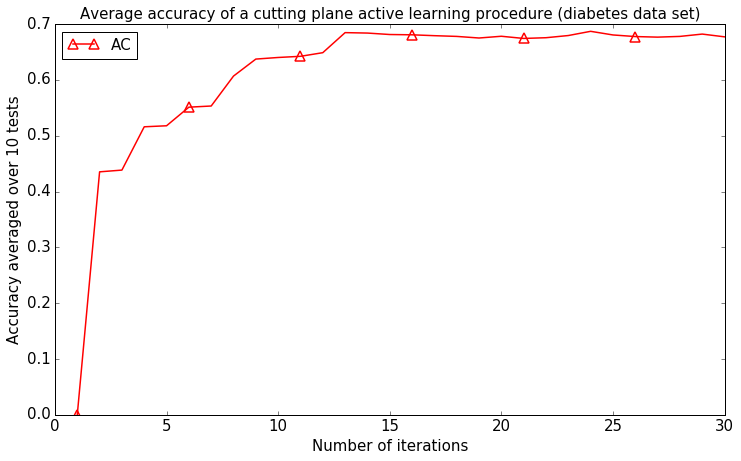

In [7]:
plt.figure(figsize=(12,7))

config = configs[0]
average_accuracies_ac = \
experiment.experiment(n, iterations, X_testing, Y_testing, 
                      X_training, Y_training, center=config[0], 
                      sample = 1, M=None)
plt.plot(queries, average_accuracies_ac, config[1], label=config[2], 
         markevery=5,
         lw=1.5, ms=10, markerfacecolor='none', markeredgewidth=1.5,
         markeredgecolor = config[1][0])

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy averaged over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning procedure (diabetes data set)')
plt.legend(loc='best')

plt.savefig('diabetes_experiment.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

**** Starting or restarting experiment ****
10 random vectors have been generated so far
100 random vectors have been generated so far
1000 random vectors have been generated so far
10000 random vectors have been generated so far
100000 random vectors have been generated so far
1000000 random vectors have been generated so far
10000000 random vectors have been generated so far
100000000 random vectors have been generated so far
1000000000 random vectors have been generated so far


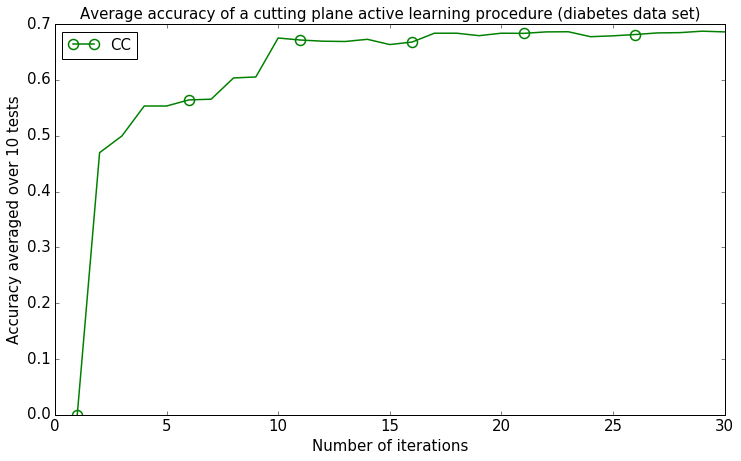

In [8]:
plt.figure(figsize=(12,7))

config = configs[1]
average_accuracies_cc = \
experiment.experiment(n, iterations, X_testing, Y_testing, 
                      X_training, Y_training, center=config[0], 
                      sample = 1, M=None)
plt.plot(queries, average_accuracies_cc, config[1], label=config[2], 
         markevery=5,
         lw=1.5, ms=10, markerfacecolor='none', markeredgewidth=1.5,
         markeredgecolor = config[1][0])

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy averaged over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning procedure (diabetes data set)')
plt.legend(loc='best')

plt.savefig('diabetes_experiment.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

**** Starting or restarting experiment ****
10 random vectors have been generated so far
100 random vectors have been generated so far
1000 random vectors have been generated so far
10000 random vectors have been generated so far
100000 random vectors have been generated so far
1000000 random vectors have been generated so far
10000000 random vectors have been generated so far
100000000 random vectors have been generated so far


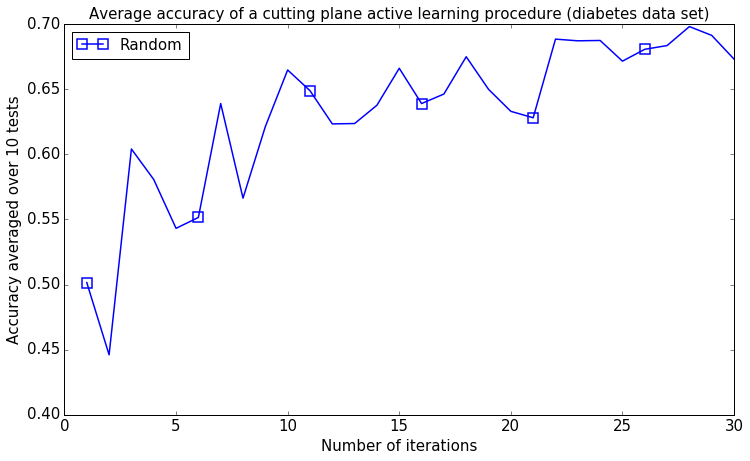

In [9]:
plt.figure(figsize=(12,7))

config = configs[2]
average_accuracies_ran = \
experiment.experiment(n, iterations, X_testing, Y_testing, 
                      X_training, Y_training, center=config[0], 
                      sample = 1, M=None)
plt.plot(queries, average_accuracies_ran, config[1], label=config[2], 
         markevery=5,
         lw=1.5, ms=10, markerfacecolor='none', markeredgewidth=1.5,
         markeredgecolor = config[1][0])

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy averaged over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning procedure (diabetes data set)')
plt.legend(loc='best')

plt.savefig('diabetes_experiment.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

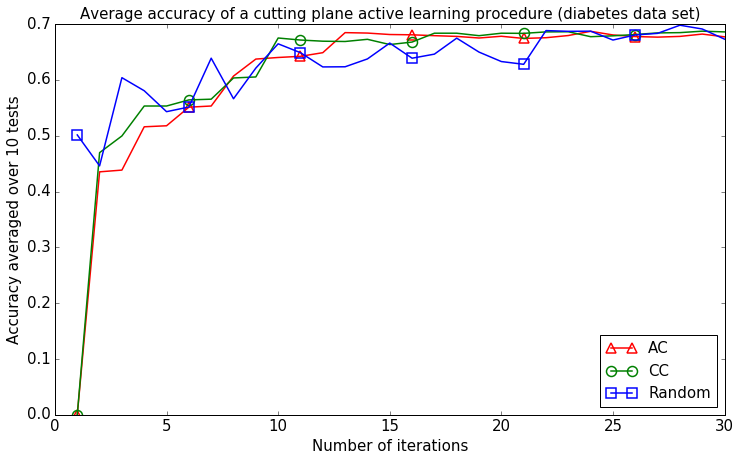

In [14]:
configs = [('ac', 'r^-', 'AC'), ('cc', 'go-', 'CC'), ('random', 'bs-', 'Random')]
queries = np.arange(1, iterations + 1)
results = [[average_accuracies_ac, configs[0]], 
           [average_accuracies_cc, configs[1]],
           [average_accuracies_ran, configs[2]]]
           
plt.figure(figsize=(12,7))

for result in results:
    plt.plot(queries, result[0], result[1][1], label=result[1][2], 
             markevery=5,
             lw=1.5, ms=10, markerfacecolor='none', markeredgewidth=1.5,
             markeredgecolor = result[1][1][0])

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy averaged over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning procedure (diabetes data set)')
plt.legend(loc='best')

plt.savefig('diabetes_experiment.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()